# SCRIPT FOR ANALYSIS OF CELLS ANALYZED WITH ISS

This script shows how to analyze a typical ISS segmented dataset. The analysis is based on Scanpy (documentation in  https://scanpy.readthedocs.io/en/stable/index.html) and Squidpy (documentation in https://squidpy.readthedocs.io/en/stable/)

## Loading the packages

We import the packages needed for it. If something fails, means that we haven't installed something in the environment

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the functions

In [3]:
def map_of_clusters(adata,key='leiden',clusters='all',size=8,background='white',figuresize=(10,7),save=None,format='pdf'):
    
    #PARAMETERS TO MODIFY:
    #-key: the terms in adata.obs that you want to plot
    #-clusters:'all' for plotting all clusters in a single plot, 'individual': for plots of individual genes, or ['3','5'] (your groups
    #          between square brackets to plot only some clusters
    #-size: to change the size of your spots
    #-background: to change the color of the background
    #-figuresize: to specify the size of your figure
    #-save: if you want to save your figure, give the PATH of the folder where you want to save it
    #-format: specify the format in which you want to save your figure
    
    try:
        adata.obs[key]=adata.obs[key].astype(int)
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    except:
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    #cl.apply(lambda x: colors[x])
    plt.rcParams['figure.facecolor'] = background
    if clusters=='all':
        cl=adata.obs[key]
        plt.figure(figsize=figuresize)
        figa=plt.scatter(x=adata.obs.X,y=adata.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        if not save==None:
            plt.savefig(save +'/map_all_clusters_'+str(size)+'_'+background+'_'+key+'.'+format)
    elif clusters=='individual':
        cl=adata.obs[key]
        for each in adata.obs[key].unique():
            adatasub=adata[adata.obs[key]==each]
            plt.figure(figsize=figuresize)
            plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
            cl=adatasub.obs[key]
            plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
            plt.axis('off')
            plt.title('Group: '+ str(each))
            if not save==None:
                plt.savefig(save +'/map_inidivdual_cluster_'+str(each)+'_'+str(size)+background+'_'+key+'.'+format)
    else:
        adatasub=adata[adata.obs[key].isin(clusters)]
        plt.figure(figsize=figuresize)
        plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
        cl=adatasub.obs[key]
        plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        plt.legend()
        if not save==None:
                s=''
                for element in clusters:
                    s=s+str(element)
                print(s)
                plt.savefig(save +'/map_group_of_clusters_'+str(s)+'_'+str(size)+background+'_'+key+'.'+format)
#        plt.title('Group: '+ paste(clusters))

## Importing the data and creating an anndata object

We import the data that is containing the infomation of every cell in a cellXgene table

In [4]:
re=pd.read_csv('C:/Users/sergio.salas/Downloads/S2T1_pcw6_complex_celltypes_formatted.csv')

If we visualize what's on the data we see that we have the expression of the analyzed genes on every cell (row) together with the XY position of the cells and other metadata.  

In [5]:
re

Unnamed: 0             X            Y  Immature endothelial 1  \
0              0    988.532325  3787.312606            4.229731e-13   
1              1   1069.522775  3984.402494            7.688518e-06   
2              2   1014.118412  4170.700890            4.681991e-02   
3              3   1085.879776  4122.941906            1.435361e-02   
4              4   1093.771630  3619.763833            2.516980e-28   
...          ...           ...          ...                     ...   
7992        7992  12373.000000  5095.000000            2.003389e-04   
7993        7993  12385.089530  6011.623672            2.179862e-05   
7994        7994  12385.622378  5192.115385            8.013010e-05   
7995        7995  12390.177215  5153.939522            2.163053e-04   
7996        7996  12389.608696  5655.294314            2.833072e-02   

      Immature endothelial 2  Proliferating endothelial 1  \
0               1.217327e-10                 2.910561e-11   
1               1.076019e-05                 1.024221e-05   
2               4.147485e-02                 4.706028e-02   
3               8.028734e-02                 4.917569e-02   
4               2.425292e-25                 1.312165e-27   
...                      ...                          ...   
7992            2.439488e-04                 1.397369e-04   
7993            3.217089e-05                 1.111304e-05   
7994            1.156050e-04                 9.545691e-05   
7995            2.006127e-04                 1.394288e-04   
7996            4.516136e-02                 3.524920e-02   

      Immature endothelial 3  Immature arterial 1       Venous   \
0               1.690861e-14         5.669160e-12  4.048466e-08   
1               5.217759e-06         3.937803e-06  4.062558e-05   
2               4.887775e-02         2.672377e-02  5.769456e-02   
3               1.310387e-02         2.058924e-01  4.113200e-02   
4               6.754184e-29         5.022944e-28  4.158016e-18   
...                      ...                  ...           ...   
7992            2.648583e-04         2.425629e-04  1.288632e-04   
7993            2.391398e-05         1.889256e-05  1.990930e-04   
7994            7.889515e-05         9.635860e-05  1.918419e-04   
7995            2.282812e-04         1.950765e-04  5.304943e-05   
7996            3.714351e-02         2.777494e-02  7.616564e-02   

      Proliferating endothelial 2  ...  UPK3B  VEGFC  VEGFD  WIF1  WNT11  \
0                    4.986064e-07  ...      3      0      0     0      0   
1                    7.545922e-06  ...      1      0      0     0      0   
2                    2.077321e-02  ...      0      0      0     0      0   
3                    2.010187e-01  ...      0      0      0     0      0   
4                    4.536668e-24  ...      0      0      0     0      0   
...                           ...  ...    ...    ...    ...   ...    ...   
7992                 3.400722e-04  ...      0      0      0     0      3   
7993                 2.772565e-05  ...      0      0      0     0      2   
7994                 1.000659e-04  ...      0      0      0     0      1   
7995                 1.862801e-04  ...      0      0      0     0      3   
7996                 4.222060e-02  ...      1      0      0     0      1   

      WNT2  WNT2B  WNT5A  WNT7B  WT1  
0        0      0      0      0    2  
1        0      0      0      0    5  
2        0      0      0      0    0  
3        0      0      0      0    2  
4        0      0      0      0    3  
...    ...    ...    ...    ...  ...  
7992     0      0      0      0    0  
7993     0      0      0      0    3  
7994     0      0      0      0    0  
7995     0      0      0      0    0  
7996     0      0      0      0    0  

[7997 rows x 220 columns]

In [6]:
data=re
metadata=data.iloc[:,0:80]
expdata=data.iloc[:,range(80,220)]

We import our data in the scanpy object called "adata". This contains the expression of all cells and the metadata. Adata contains information for 143.786 cells (before filtering)

In [7]:
adata = sc.AnnData(expdata)
adata.obs=metadata

C:\Users\sergio.salas\Miniconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


The object where our data is contained is called anndata (documentation in https://anndata.readthedocs.io/en/latest/). The expression is stored in adata.X. The metadata is stored in adata.obs. The data associated with the genes is stored in adata.var

In [15]:
adata.X

array([[0., 0., 1., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 5.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

 We calculate the total number of reads in each cell and store it in 'total_counts'.We keep cells with more than X reads and less than Y reads

In [9]:
maximum_numbers_of_reads=200
minimum_number_of_reads=10

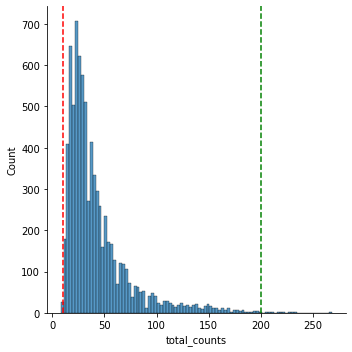

In [10]:
adata.obs['total_counts']=list(np.sum(expdata.loc[:,:],axis=1))
sns.displot(adata.obs,x='total_counts')
plt.axvline(x=maximum_numbers_of_reads,color='green',linestyle='--')
plt.axvline(x=minimum_number_of_reads,color='red',linestyle='--')
adata=adata[adata.obs['total_counts']>minimum_number_of_reads] #adjust the numbers to keep good cells according to appropiate ones
adata=adata[adata.obs['total_counts']<maximum_numbers_of_reads] #adjust the numbers to more than

# Normalization of the data

We now save the raw data in adata.raw and apply normalization and log-transformation to minimize the effect of outliers. We also scale the data to give the same importance to all genes in clustering

In [11]:
adata.raw=adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

C:\Users\sergio.salas\Miniconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[OPTIONAL] After normalizing and logmarizing, the data we CAN, if we wish, filter only highly variable genes for clustering. This step is key in the analysis of single cell RNA sequencing datasets (with +20.000 genes) but it's not that useful in targeted methods such as ISS. However, it can help to keep variables only for clustering

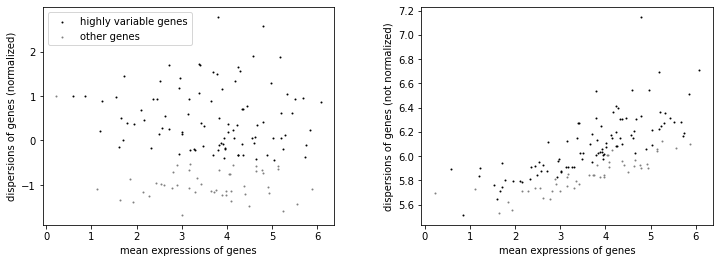

In [12]:
plt.rcParams['figure.facecolor'] = 'white'
sc.pp.highly_variable_genes(adata, min_mean=0.3, max_mean=7, min_disp=-0.5)
sc.pl.highly_variable_genes(adata)
adata=adata[:,adata.var.highly_variable==True]

[OPTIONAL] We can also scale the data. This means that we scale the expression of every gene between 0 and 1. This will give decrease the impact of highly expressed genes and will increase the importance of lowly expressed genes

In [13]:
sc.pp.scale(adata,max_value=10)

C:\Users\sergio.salas\Miniconda3\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


# Dimensional reduction and clustering

We apply principal component analysis to find the appropiate nubmer of components to use to perform dimensionality reduction and clustering

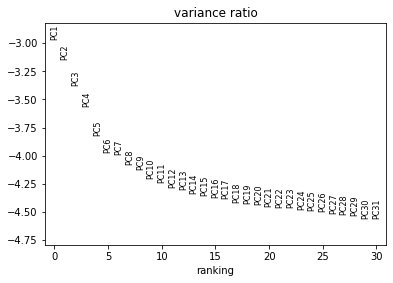

In [14]:
sc.tl.pca(adata, svd_solver='arpack')
plt.rcParams['figure.facecolor'] = 'white'
sc.pl.pca_variance_ratio(adata, log=True)

We select to go with the top X first principal components to look for the nearest neighbors. We are going to represent our data using graph-based methods, like UMAP. For this, we first need to create a graph by linking each cell to the n closest neighbors (n_neighbors) in the dataset. We can select the numbers of principal components to use

In [15]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

We can, then, run clustering, by calling either leiden or louvain clustering. By changing the parameter "resolution" we will generate more or less clusters. Higher resolution means more clusters. The clusters (groups of cells) are indepent from its visualization, which we will create using UMAP later on

In [16]:
sc.tl.leiden(adata,resolution=1.0)

To VISUALIZE the diversity of our cells, We perfrom UMAP. The closest two spots are in UMAP, the more similar they will be. With the comand sc.tl.umap. we CALCULATE the UMAP embedding. With sc.pl.umap will VISUALIZE the UMAP.

In [17]:
sc.tl.umap(adata,min_dist=0.005)

On top of the UMAP you can visualize any variable that you might be interested (a metadata column or gene expression). We need to modify the parameter "color" to visualize the appropiate variable on the UMAP

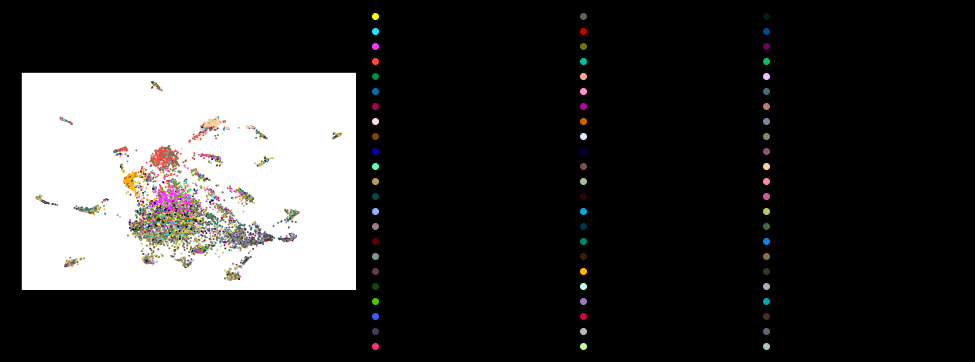

In [27]:
sc.pl.umap(adata,color=['cell type'])#,save='chickbrain_UMAP_bins.pdf')

One example is the visualization of the expression of some genes in the UMAP, as we can see here:

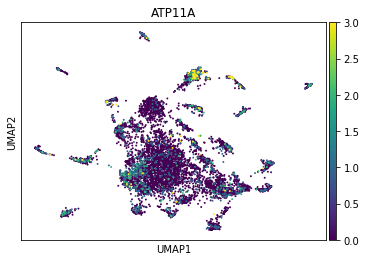

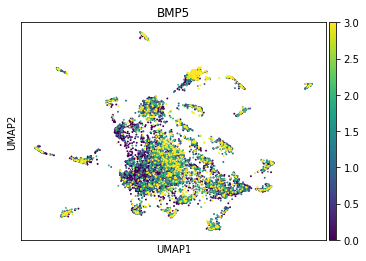

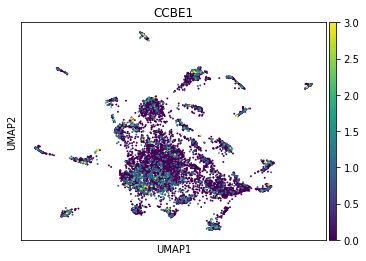

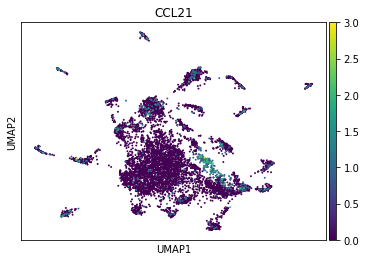

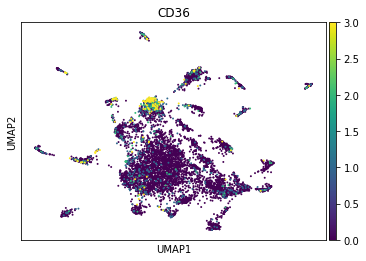

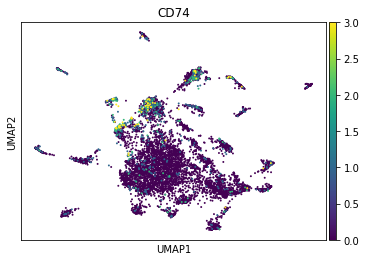

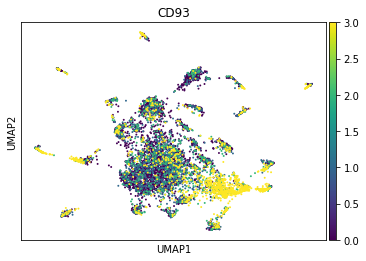

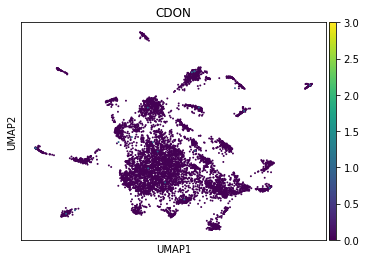

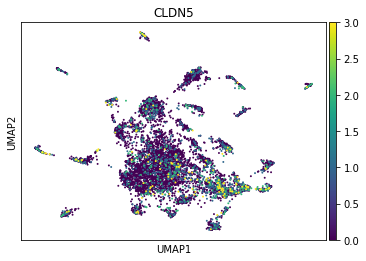

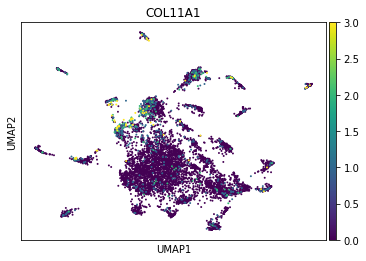

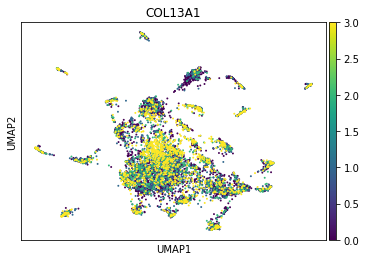

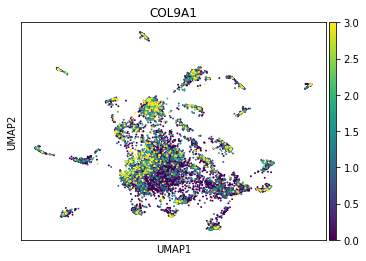

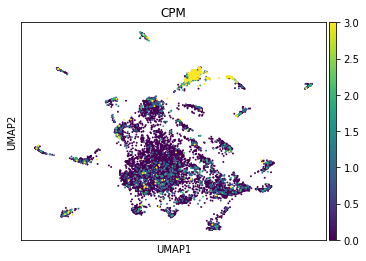

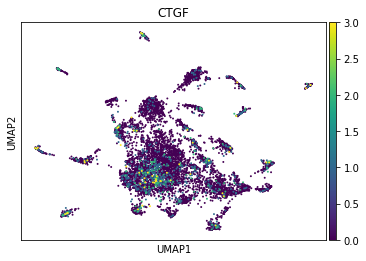

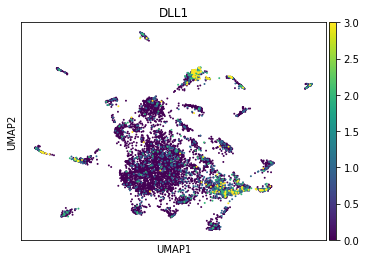

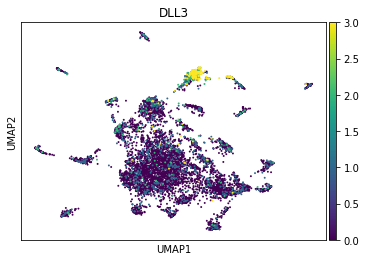

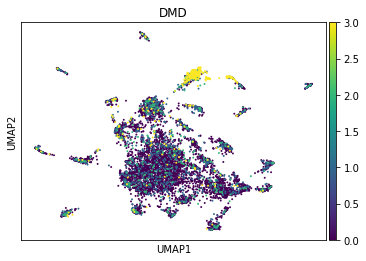

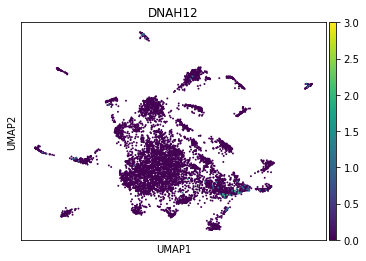

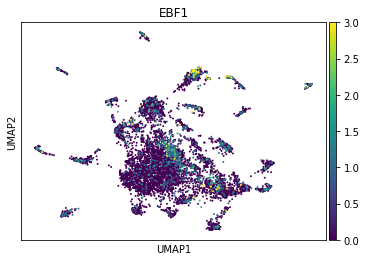

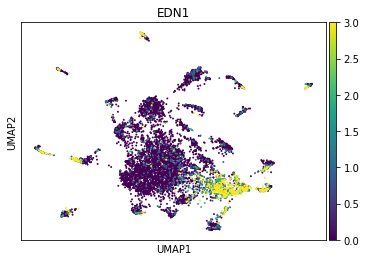

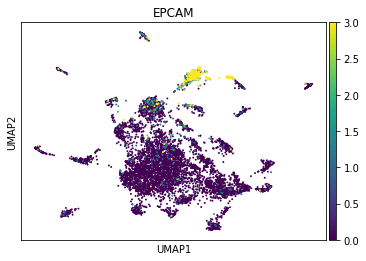

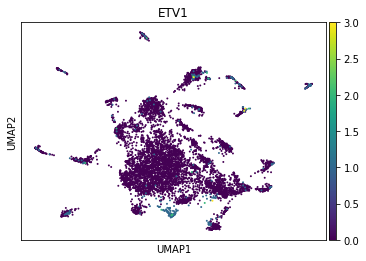

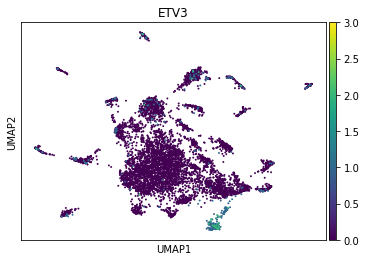

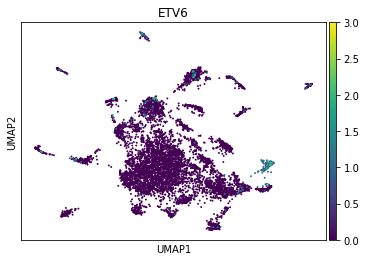

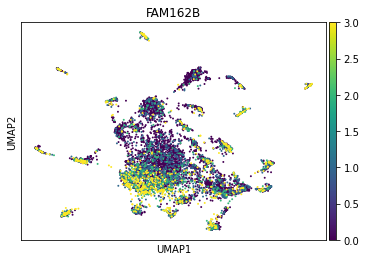

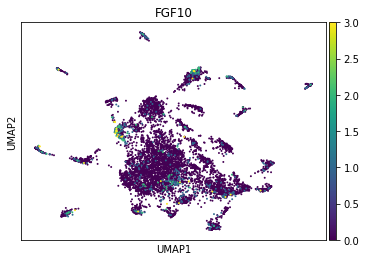

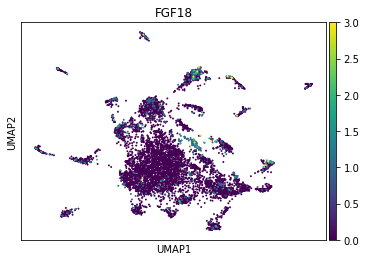

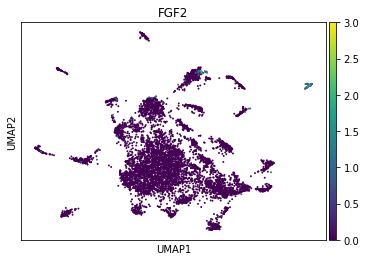

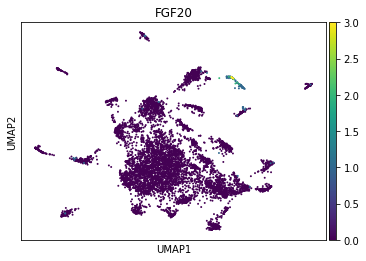

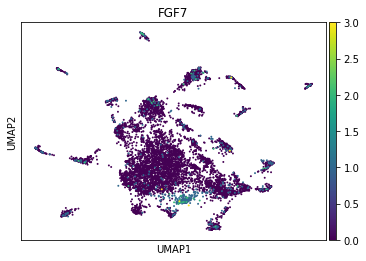

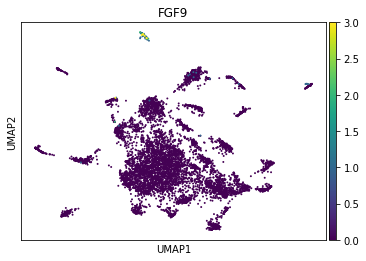

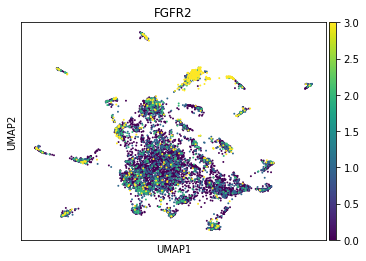

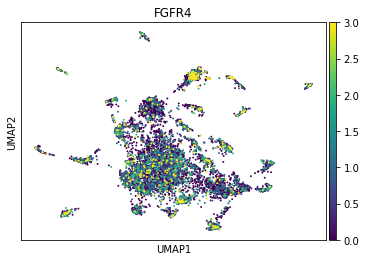

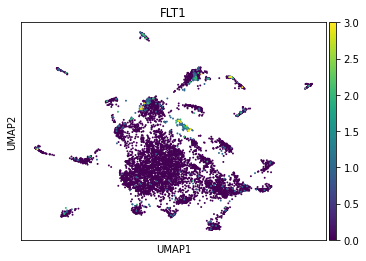

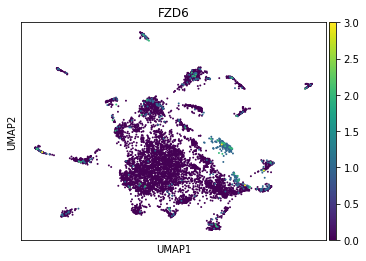

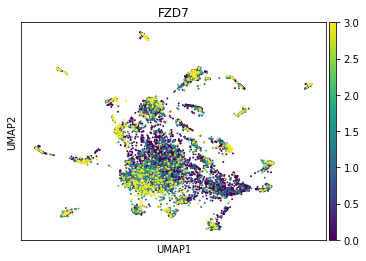

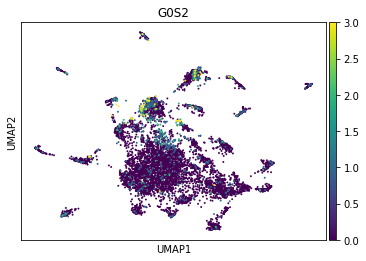

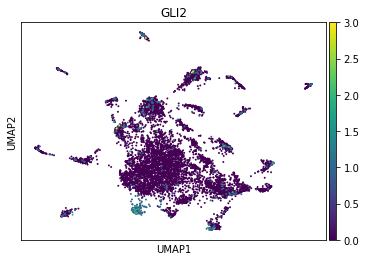

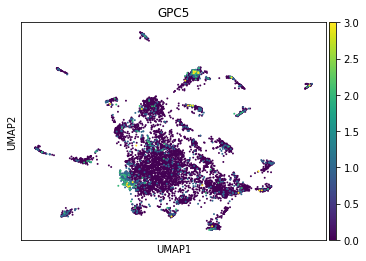

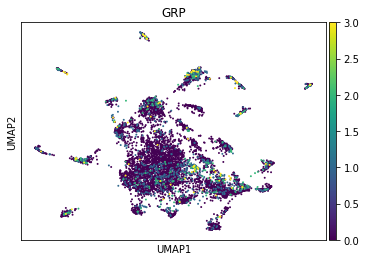

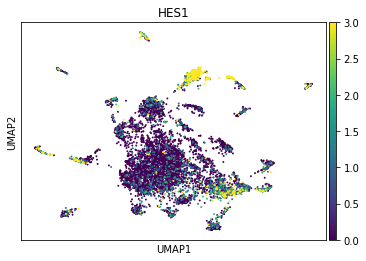

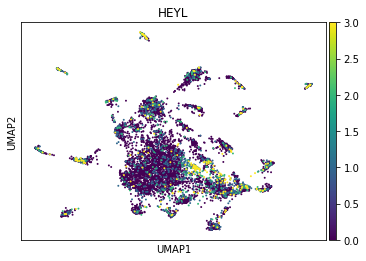

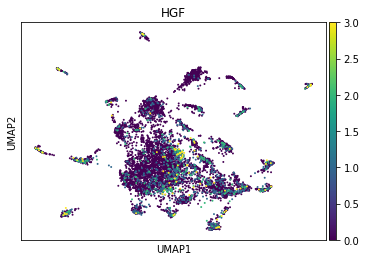

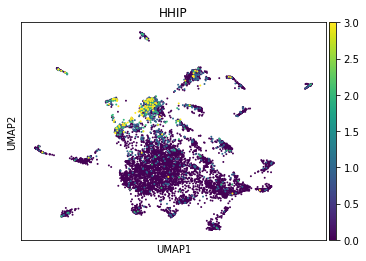

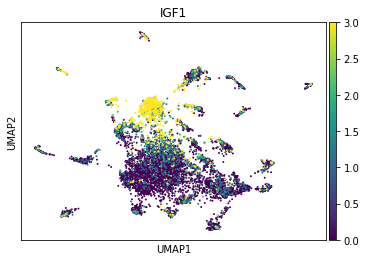

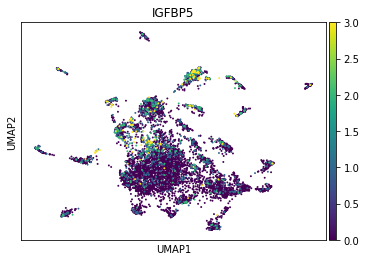

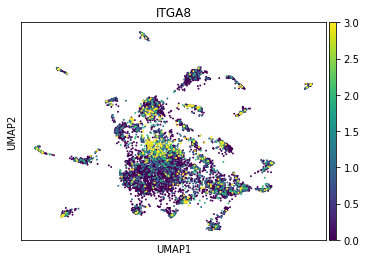

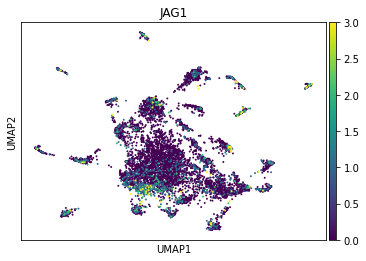

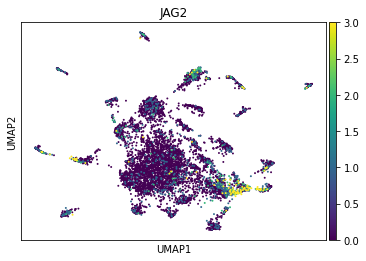

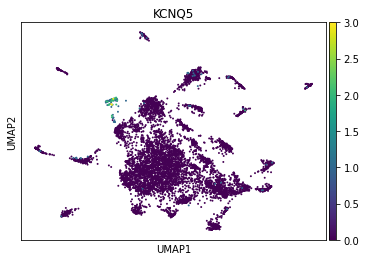

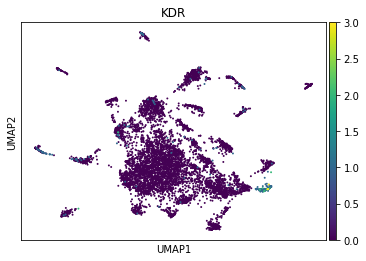

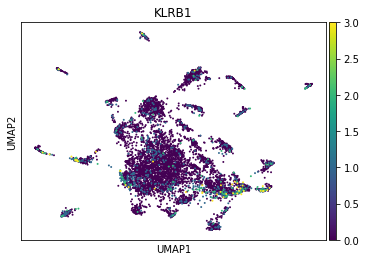

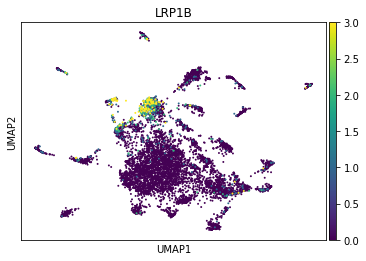

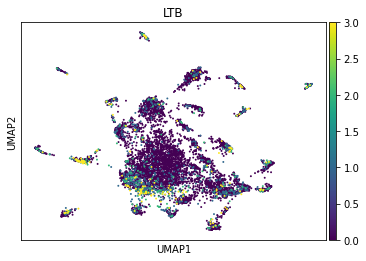

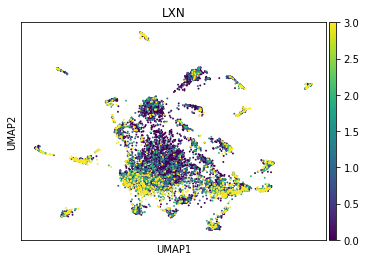

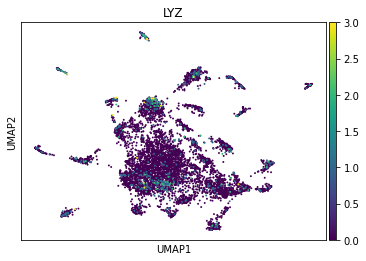

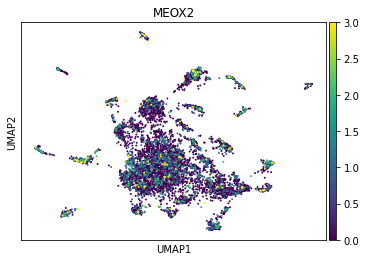

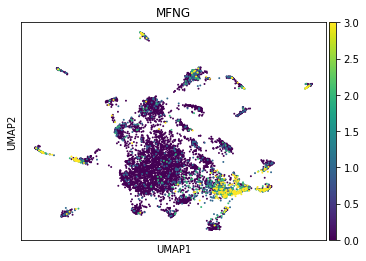

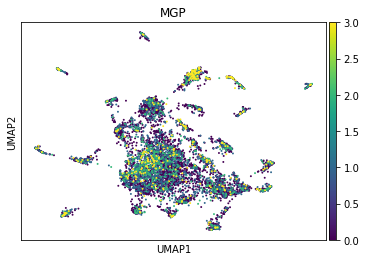

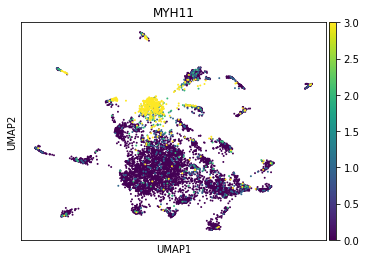

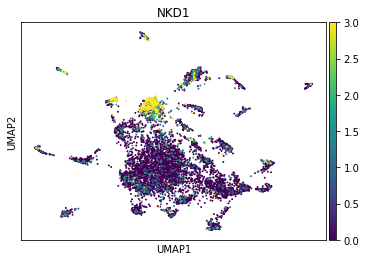

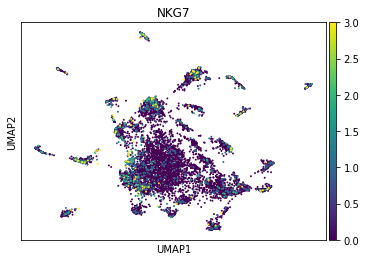

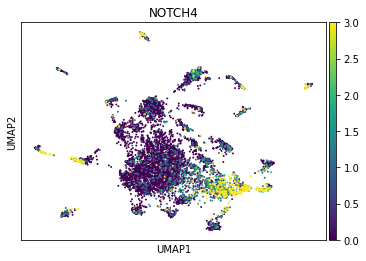

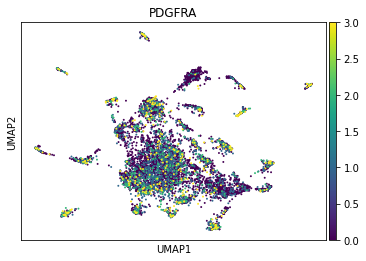

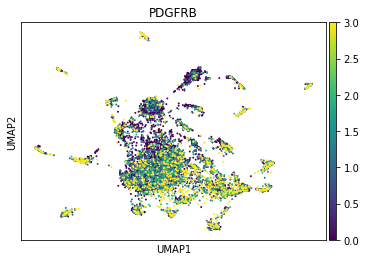

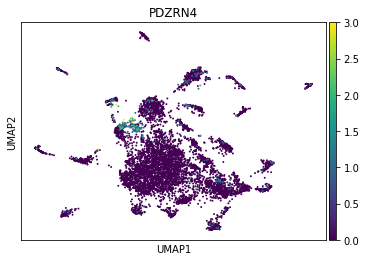

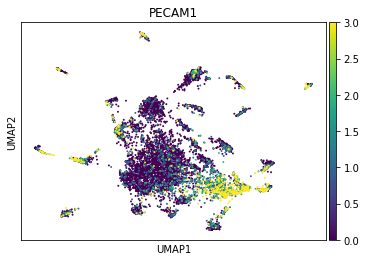

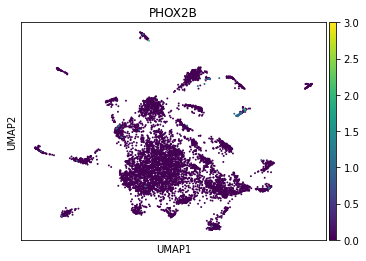

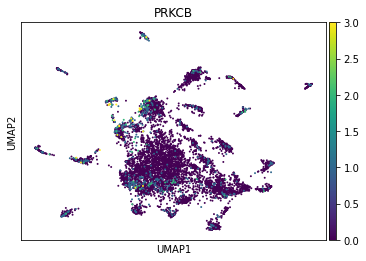

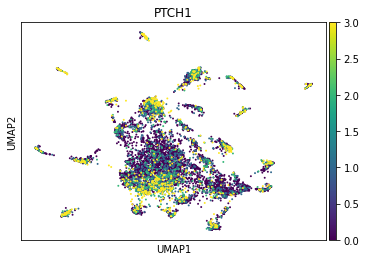

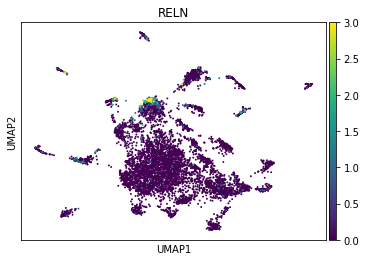

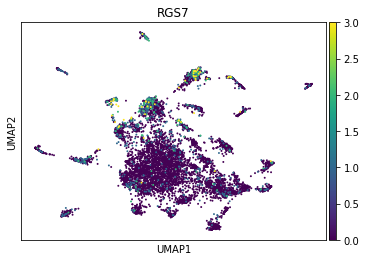

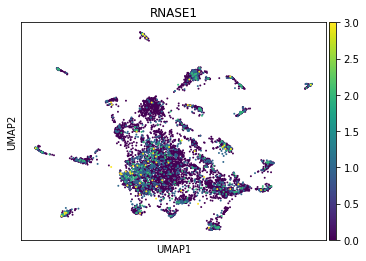

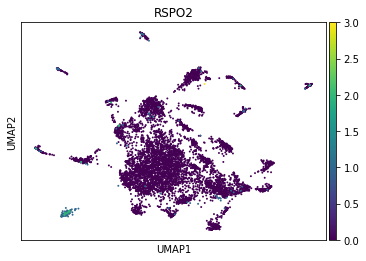

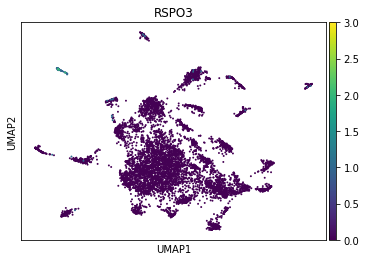

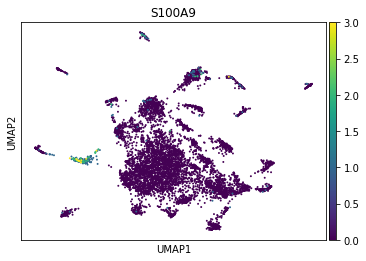

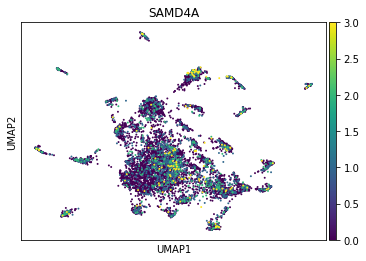

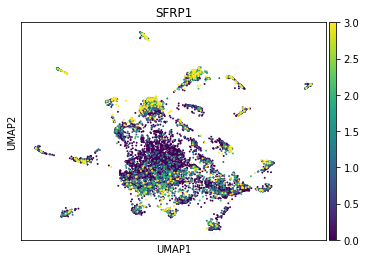

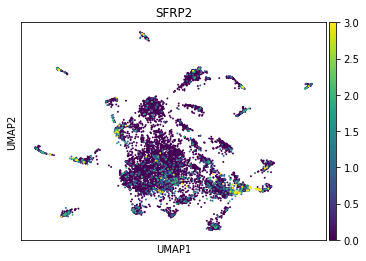

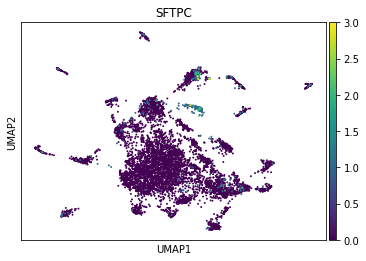

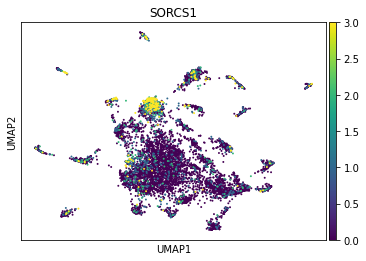

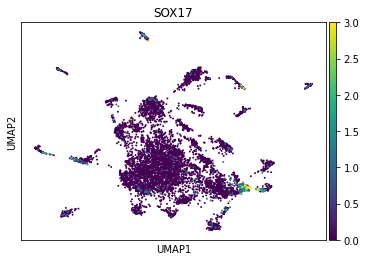

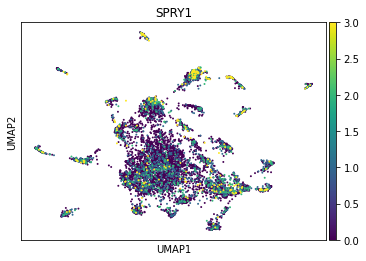

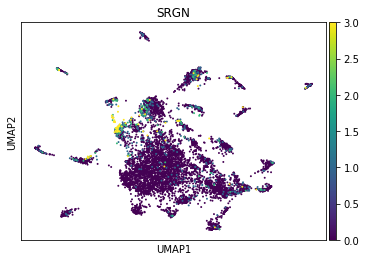

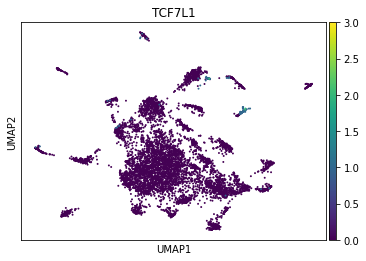

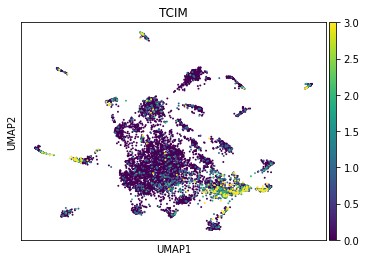

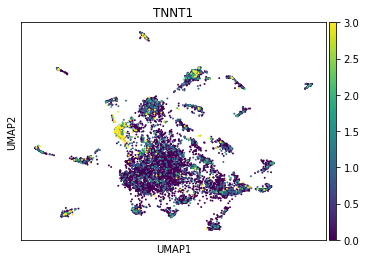

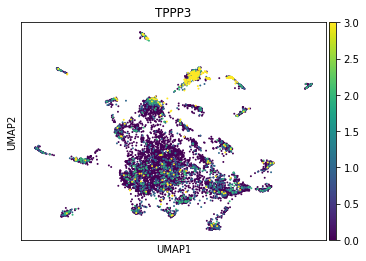

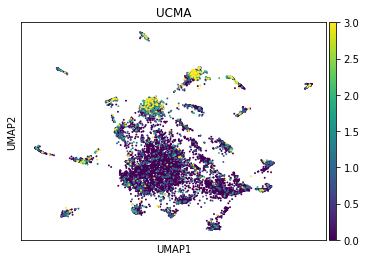

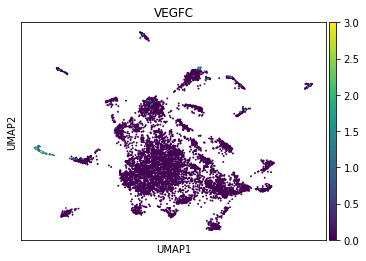

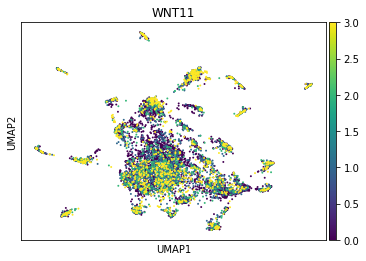

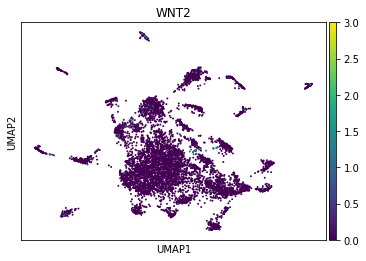

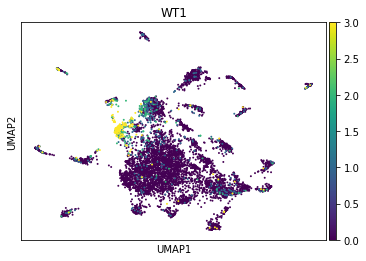

In [19]:
plt.rcParams['figure.facecolor'] = 'white'
for es in adata.var.index:
    sc.pl.umap(adata,color=es,cmap='viridis',vmax=3)

# Plotting clusters on the tissue

We now go back to the tissue and plot the clusters back. For this we use the function 'map_of_clusters' to plot clusters on the tissue

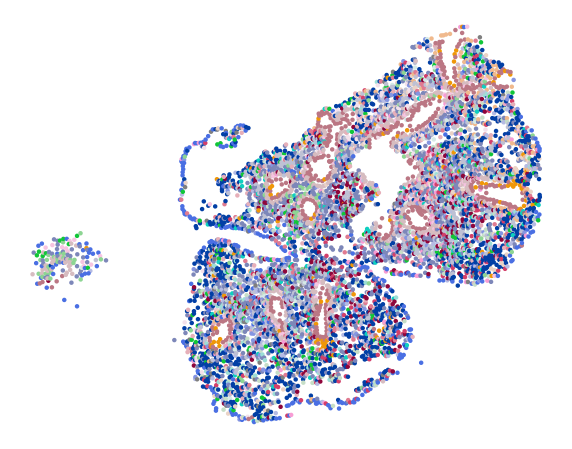

In [81]:
map_of_clusters(adata,key='leiden',size=20,background='white',clusters='all',figuresize=(10,8))#,save='C:/Users/sergio.salas/Documents/PhD',format='pdf')

# Looking at differences between clusters  in expression

One of the things we are interested at this point are the markers that are expressed in different clusters. For this, we can calculate the differentially expressed genes (DE genes) using the function rank_genes_groups. We first calculate them, indicating our 'key'. Several tests can be run with different properties. For our case, we prefer to use Wilcoxon, but you can use other ones in:https://scanpy.readthedocs.io/en/latest/generated/scanpy.tl.rank_genes_groups.html#scanpy.tl.rank_genes_groups

In the plots, we see that different genes are popping when comparing specific clusters VS all the cells. We have one plot for evey cluster. The genes are also ranked on the X axis according to their score (Y axis). The higher the score is (Y axis) the more the gene will be differentially expressed in that cluster.

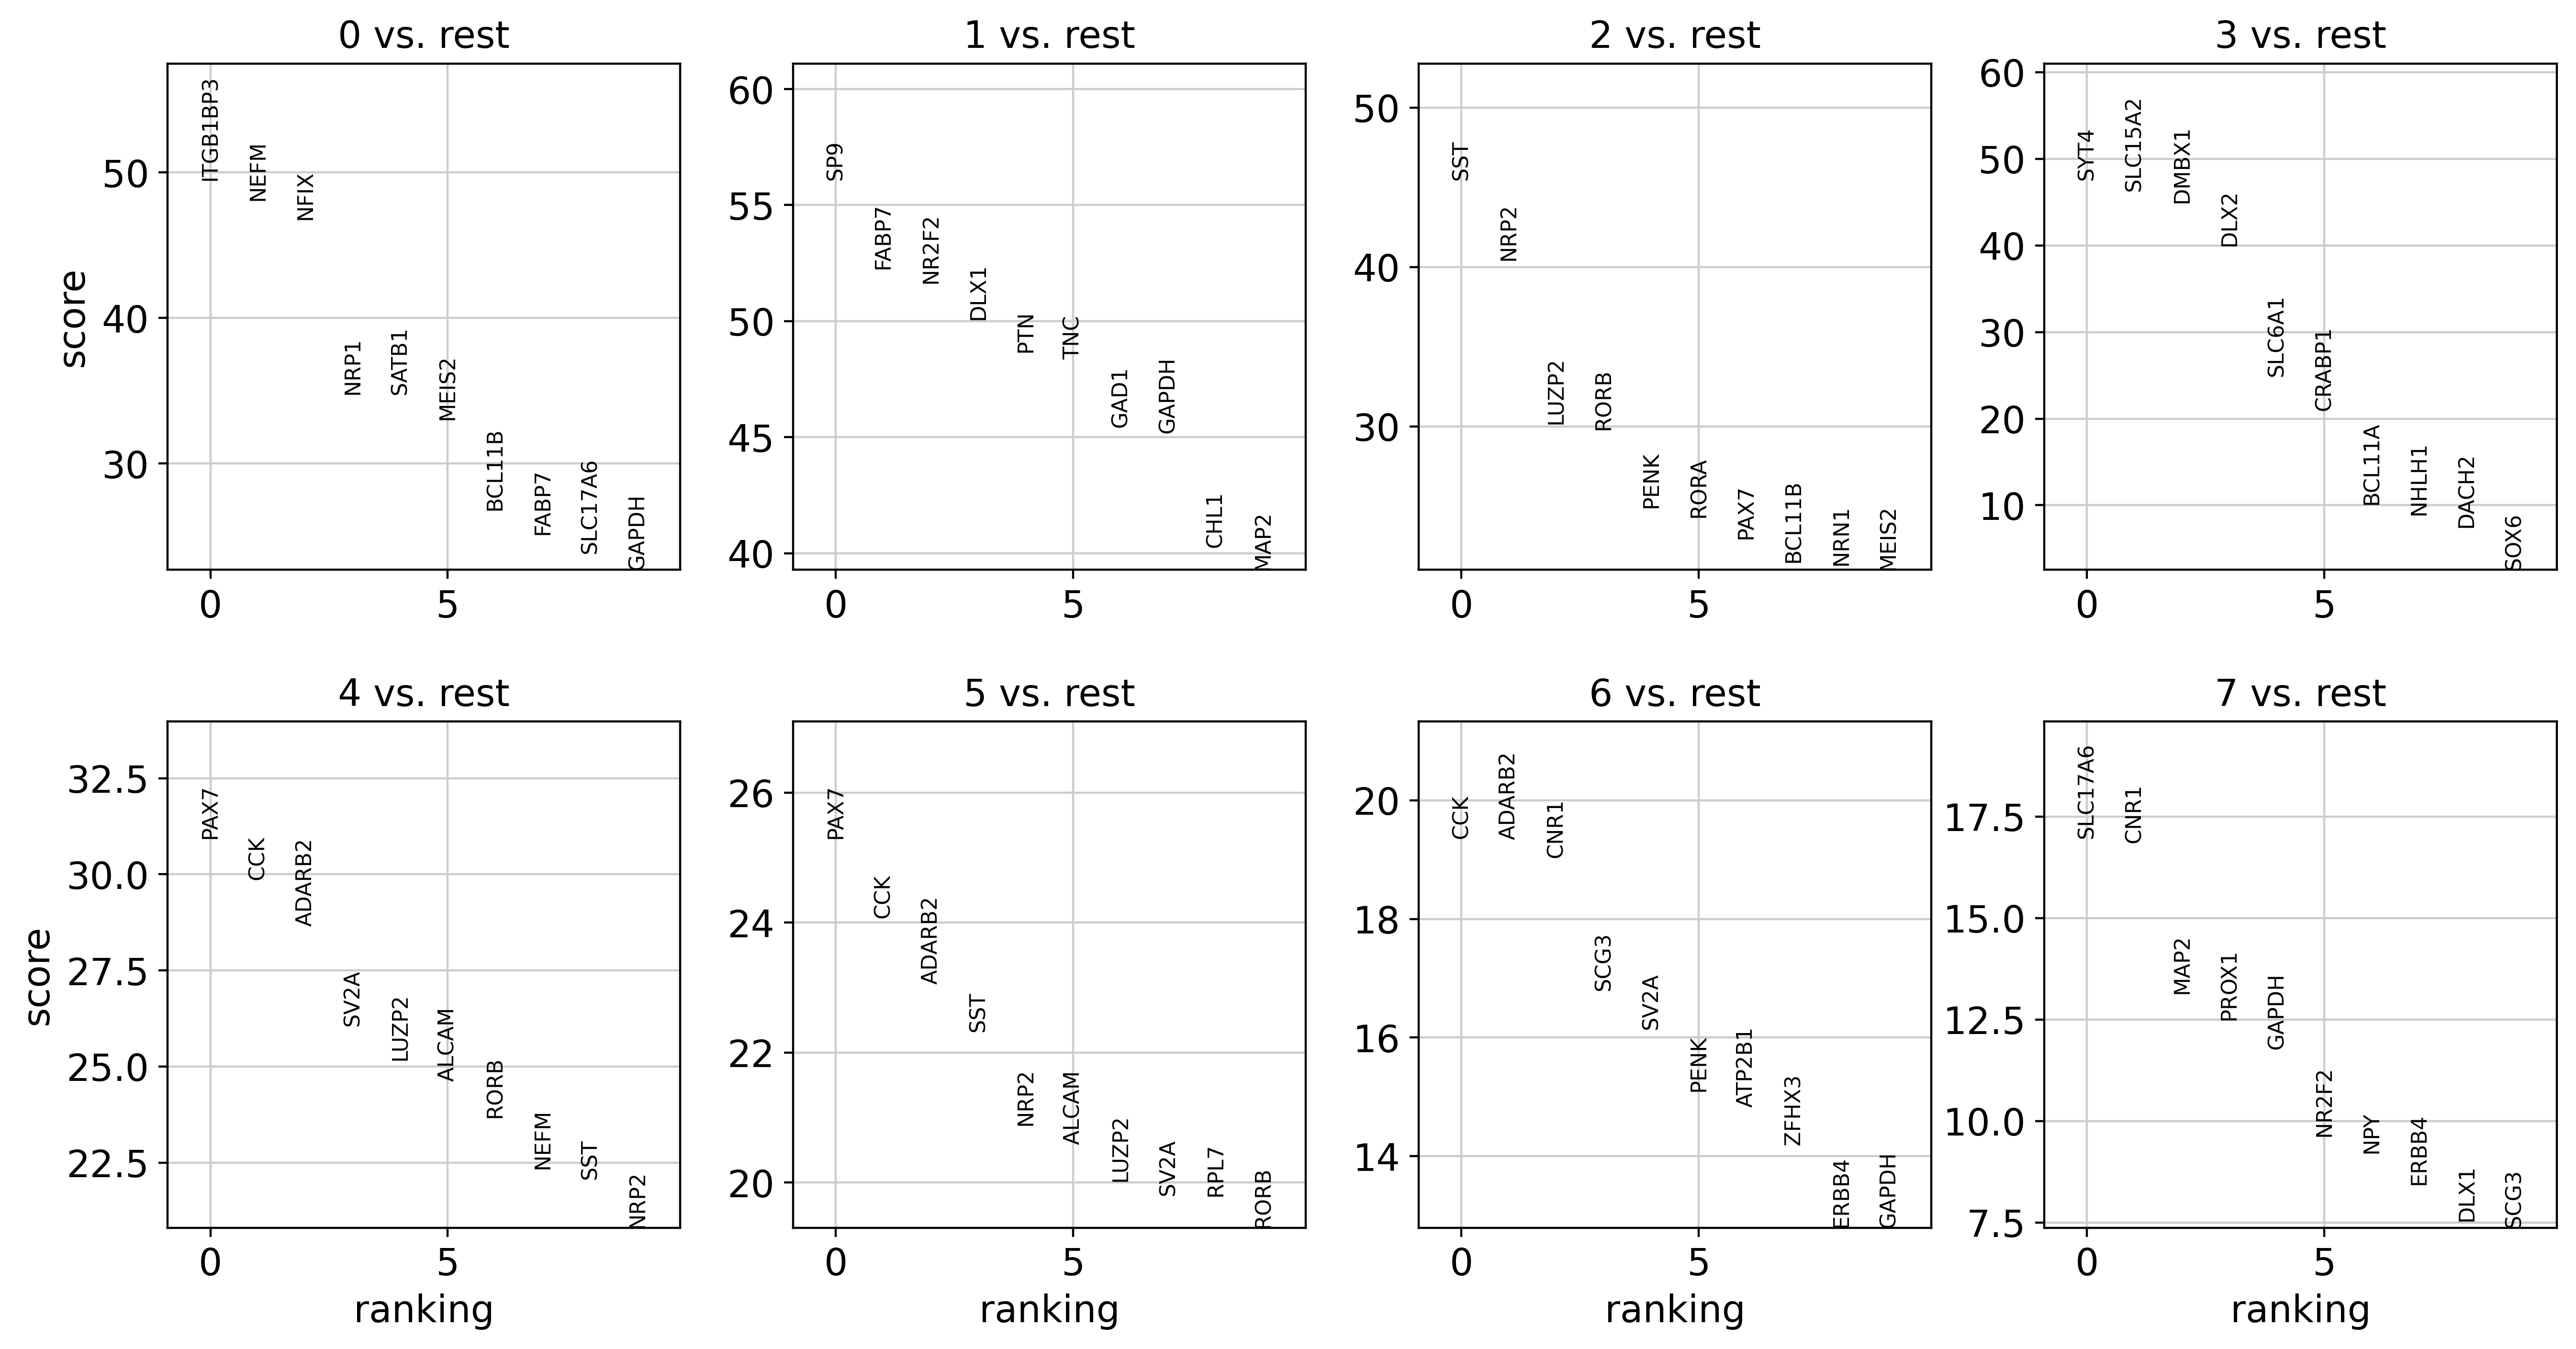

In [140]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False, key="wilcoxon")

At this point, one maybe wants to represent this differences between clusters in a more visual way. There are many different ways to visualize this (dotplots, violin plots, matrix plots, heatmaps...). We strongly recomend you explore the following tutorial: https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html. Any function that you pick from there and add it to your script should work at this point.

As an example, we are going to generate one of the most common plots, a dotplot. Inportantly, in var_names we need to add the names of the genes that we want to visualize

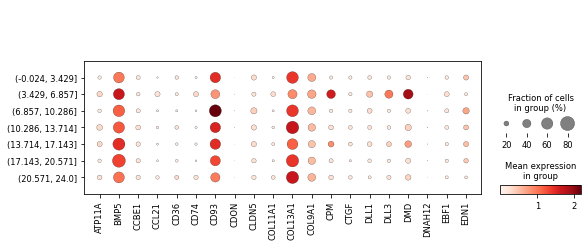

In [83]:
sc.pl.dotplot(adata,groupby='leiden',var_names=adata.var.index[0:20])

In dotplots, the stronger the color is (according to the legend), the higher the mean expression is. In addition, the size of the circle represents the percentage of cells in the clusters that are expressing a certain gene

# Saving and loading an anndata object

Depending on your data, it might take a while to go though all this analysis successfully. Therefore, it's interesting that you can save and load your processed data whenever you want. To save your object, you use the following command:


In [88]:
adata.write('C:/Users/sergio.salas/Documents/PhD/environments/adata.h5')

On the other hand, if you wish to load the pre-saved object,just do:

In [89]:
adata=sc.read('C:/Users/sergio.salas/Documents/PhD/environments/adata.h5')

After finding the clusters and plotting them, one might want to calculate some spatial statistics. For this, a very useful tool is squidpy. You can visit that tutorial to learn a bit more about how to use it